# Defining the Question

#### Problem Statement

The purpose of the project is to create a machine learning model to be able to classify bananas based on the rippening stage.The model is aimed at automation in large scale banana farming, Banana factories and/or  stores for fast and efficient sorting of bananas based on their rippening stage.

#### Defining the Metric for Success

creating a model that can accuratly/correctly classify bananas in their correct classes with an accuracy level of 80% and above.

#### Recording the Experimental Design

For our project, we will be using Convolutional Neural network for classification since our data/input is in form of Images.


#### Data Relevance

The data used in the model is in the form of images for image classification. The dataset contains images of bananas at their different stages of rippening which falls under distinct classes for classification.The banana images are of musa acuminata species.

## Importing the Libraries

In [93]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import cv2
from skimage import io
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [94]:
#!pip install opencv-python

## EDA

##### checking the data

In [95]:
#loading a sample image from the  dataset
img=image.load_img(r"D:\Banana Ripening Process.v1-raw.createml\train\Freshripe\musa-acuminata-freshripe-4a4d77e5-2653-11ec-9a63-d8c4975e38aa_jpg.rf.e51fcad61498cc8ca3591f9942b57cc6.jpg")

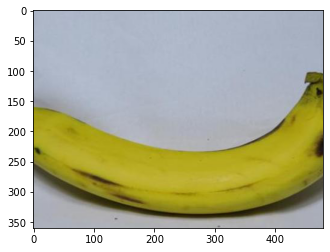

In [96]:
plt.imshow(img)

In [97]:
#!pip install tensorflow

In [98]:
#Reading the image with CV2
cv2.imread(r"D:\Banana Ripening Process.v1-raw.createml\train\Freshripe\musa-acuminata-freshripe-4a4d77e5-2653-11ec-9a63-d8c4975e38aa_jpg.rf.e51fcad61498cc8ca3591f9942b57cc6.jpg")

array([[[198, 181, 172],
        [197, 180, 171],
        [197, 180, 171],
        ...,
        [193, 176, 167],
        [193, 176, 167],
        [193, 176, 167]],

       [[198, 181, 172],
        [197, 180, 171],
        [197, 180, 171],
        ...,
        [193, 176, 167],
        [193, 176, 167],
        [193, 176, 167]],

       [[198, 181, 172],
        [197, 180, 171],
        [197, 180, 171],
        ...,
        [193, 176, 167],
        [193, 176, 167],
        [193, 176, 167]],

       ...,

       [[187, 175, 171],
        [187, 175, 171],
        [187, 175, 171],
        ...,
        [184, 173, 169],
        [184, 173, 169],
        [184, 173, 169]],

       [[187, 175, 171],
        [187, 175, 171],
        [187, 175, 171],
        ...,
        [184, 173, 169],
        [184, 173, 169],
        [184, 173, 169]],

       [[187, 175, 171],
        [187, 175, 171],
        [187, 175, 171],
        ...,
        [184, 173, 169],
        [184, 173, 169],
        [184, 173, 169]]

We went through the folders manually and scrolled through the images to ensure that they were correctly labeled. We found the number of images per class being imbalanced so we decided to add more images to those that had less than 500 images through data augumentation and reduced those that had more than 500 by manually deleting the images. The data augmentation was done in batches for each class separately to ensure the extra images were generated using sample images of its class.

## Data Augumentation to create more images

In [99]:
##Specifying the Augmentation parameters
# datagen = ImageDataGenerator(
#         rotation_range=45,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='constant', cval=0)

In [100]:
## augmenting more images  and storing them in augmented folder.
# from skimage import io
# import os
# from PIL import Image
# image_directory = r"D:\Banana Ripening Process.v1-raw.createml\train\unripe"
# SIZE = 256
# dataset = []
# my_images = os.listdir(image_directory)
# for i, image_name in enumerate(my_images):
#         image = io.imread(image_directory +'\\'+ image_name)
#         image = Image.fromarray(image, 'RGB')
#         image = image.resize((SIZE,SIZE))
#         dataset.append(np.array(image))
# x = np.array(dataset)
# augmented = r"D:\Banana Ripening Process.v1-raw.createml\train\augmented  folder"
# i = 0
# for batch in datagen.flow(x, batch_size=16,
#                           save_to_dir=augmented,
#                           save_prefix='musa-acuminata-unripe-4a4d77e5-2653-11ec-9a63-d8c4975e38aa_jpg',
#                           save_format='jpg'):
#     i += 1
#     if i > 5:
#         break

## Reading the data

In [101]:
##Normalization of the values to range 0 to 1
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)

In [102]:
train_dataset=train.flow_from_directory(r"D:\Banana Ripening Process.v1-raw.createml\train",
                                       target_size = (200,200),
                                       batch_size = 64,
                                       class_mode = 'categorical')

validation_dataset=validation.flow_from_directory(r"D:\Banana Ripening Process.v1-raw.createml\valid",
                                       target_size = (200,200),
                                       batch_size = 64,
                                       class_mode = 'categorical')

test_dataset = test.flow_from_directory(r"D:\Banana Ripening Process.v1-raw.createml\test",
                                       target_size = (200,200),
                                       batch_size = 64,
                                        shuffle = False,
                                       class_mode = 'categorical')
#The data is in sub_folders representing the classes

Found 3500 images belonging to 7 classes.
Found 529 images belonging to 7 classes.
Found 480 images belonging to 7 classes.


In [103]:
#Checking the different Classes in each dataset
validation_dataset.class_indices

{'freshripe': 0,
 'freshunripe': 1,
 'mold': 2,
 'overripe': 3,
 'ripe': 4,
 'rotten': 5,
 'unripe': 6}

In [104]:
train_dataset.class_indices

{'freshripe': 0,
 'freshunripe': 1,
 'mold': 2,
 'overripe': 3,
 'ripe': 4,
 'rotten': 5,
 'unripe': 6}

In [105]:
test_dataset.class_indices

{'freshripe': 0,
 'freshunripe': 1,
 'mold': 2,
 'overripe': 3,
 'ripe': 4,
 'rotten': 5,
 'unripe': 6}

In [106]:
#Building the CNN model 
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation ='relu',input_shape=(200,200,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                  #
                                 tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                  #
                                 tf.keras.layers.Conv2D(64,(3,3),activation ='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                  #
                                 tf.keras.layers.Conv2D(128,(3,3),activation ='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 ##
                                 tf.keras.layers.Flatten(),
                                 ##
                                 tf.keras.layers.Dense(64,activation ='relu'),
                                 tf.keras.layers.Dropout(.2),
                                 ##
                                 ##
                                 tf.keras.layers.Dense(7,activation ='softmax')
                                   ])

In [107]:
#CNN model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 64)      

In [108]:
#Compiling our model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [109]:
#Fitting our model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)
model_fit=model.fit(train_dataset,
                   steps_per_epoch=50,
                    callbacks=[callback],
                   epochs=70,
                   validation_data=validation_dataset)

Epoch 1/70
50/50 [==============================] - 126s 2s/step - loss: 1.4603 - accuracy: 0.3953 - val_loss: 1.0549 - val_accuracy: 0.5161
Epoch 2/70
50/50 [==============================] - 86s 2s/step - loss: 0.9188 - accuracy: 0.6220 - val_loss: 0.9147 - val_accuracy: 0.5860
Epoch 3/70
50/50 [==============================] - 85s 2s/step - loss: 0.7684 - accuracy: 0.6858 - val_loss: 0.6897 - val_accuracy: 0.6975
Epoch 4/70
50/50 [==============================] - 85s 2s/step - loss: 0.6580 - accuracy: 0.7334 - val_loss: 0.6067 - val_accuracy: 0.7335
Epoch 5/70
50/50 [==============================] - 84s 2s/step - loss: 0.5421 - accuracy: 0.7747 - val_loss: 0.5734 - val_accuracy: 0.7713
Epoch 6/70
50/50 [==============================] - 85s 2s/step - loss: 0.5242 - accuracy: 0.7796 - val_loss: 0.5931 - val_accuracy: 0.7486
Epoch 7/70
50/50 [==============================] - 86s 2s/step - loss: 0.4677 - accuracy: 0.8113 - val_loss: 0.5829 - val_accuracy: 0.7372
Epoch 8/70
50/50 [=

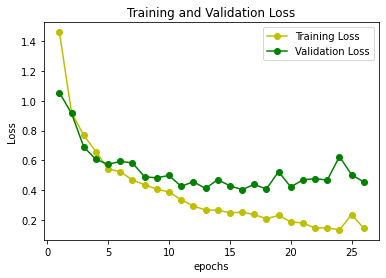

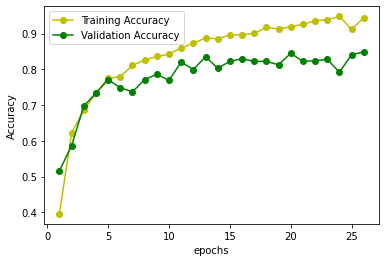

In [110]:
#plotting the loss and accuracy
loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "yo-", label="Training Loss")
plt.plot(epochs, val_loss, 'go-', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
accuracy = model_fit.history['accuracy']
val_accuracy = model_fit.history['val_accuracy']
plt.plot(epochs, accuracy, 'yo-' ,label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'go-' ,label="Validation Accuracy")
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [111]:
# Making the predictions using our test Dataset
predictions = model.predict(test_dataset)
#Rounding off to the nearest integer i.e. 0 or 1
np.round(predictions)

8/8 [==============================] - 16s 2s/step


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [112]:
#Getting our confusion Matrix based on our prediction
cm = metrics.confusion_matrix(test_dataset.classes, np.argmax(predictions, axis = -1))
cm

array([[53,  0,  0,  0,  1,  0,  0],
       [ 0, 65,  0,  0,  0,  0,  0],
       [ 0,  0, 23, 18,  2,  0,  0],
       [ 0,  0,  7, 61,  1,  0,  0],
       [ 1,  0,  1,  4, 75,  1,  0],
       [ 0,  0,  1,  5, 16, 67,  7],
       [ 0, 12,  0,  0,  0,  3, 56]], dtype=int64)

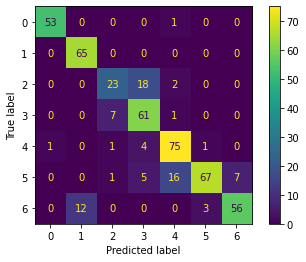

In [113]:
#Confusion matrix displayed 
cm_display = ConfusionMatrixDisplay(cm).plot()

In [114]:
#Checking our test accuracy
test_accuracy = metrics.accuracy_score(test_dataset.classes, np.argmax(predictions, axis = -1))
test_accuracy


0.8333333333333334

Our model has achieved 83% accuracy on our test dataset which falls within our desired accuracy level. We now look at how it performs on different images gotten online

#### Implementing  and Challenging the solution

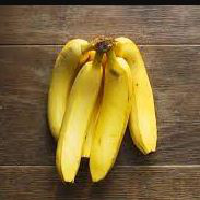

In [115]:
#Test 1
test_image1 = image.load_img(r"D:\Banana Ripening Process.v1-raw.createml\testing\fresh ripe.JPG",target_size =(200,200,3))
test_image1

In [116]:
test_image1=image.img_to_array(test_image1)/255
test_image1=np.expand_dims(test_image1,axis = 0)
np.round(model.predict(test_image1))

1/1 [==============================] - 2s 2s/step


array([[0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

The image has been correctly classified as ripe

In [117]:
test_dataset.class_indices

{'freshripe': 0,
 'freshunripe': 1,
 'mold': 2,
 'overripe': 3,
 'ripe': 4,
 'rotten': 5,
 'unripe': 6}

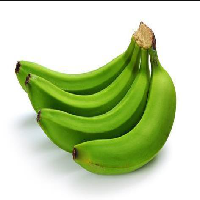

In [130]:
#Test 6
test_image6 = image.load_img(r"D:\Banana Ripening Process.v1-raw.createml\testing\fresh unripe1.JPG",target_size =(200,200,3))
test_image6

In [131]:
test_image6=image.img_to_array(test_image6)/255
test_image6=np.expand_dims(test_image6,axis = 0)
np.round(model.predict(test_image6))

1/1 [==============================] - 1s 1s/step


array([[0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

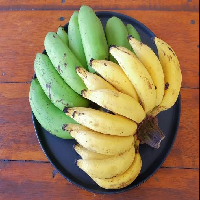

In [118]:
#Testing with two classes in the same image
test_image2 = image.load_img(r"D:\Banana Ripening Process.v1-raw.createml\testing\ripe & unripe.JPG",target_size =(200,200,3))
test_image2

In [119]:
test_image2=image.img_to_array(test_image2)/255
test_image2=np.expand_dims(test_image2,axis = 0)
np.round(model.predict(test_image2))

1/1 [==============================] - 0s 146ms/step


array([[0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

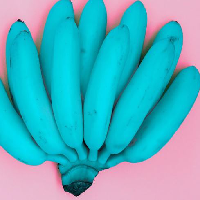

In [120]:
#Testing withan image of a different Banana speceis
test_image3 = image.load_img(r"D:\Banana Ripening Process.v1-raw.createml\testing\blue banana.JPG",target_size =(200,200,3))
test_image3

In [121]:
test_image3=image.img_to_array(test_image3)/255
test_image3=np.expand_dims(test_image3,axis = 0)
np.round(model.predict(test_image3))

1/1 [==============================] - 0s 42ms/step


array([[0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

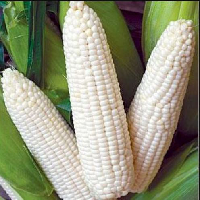

In [122]:
#testing with a non Banana Image
test_image4 = image.load_img(r"D:\Banana Ripening Process.v1-raw.createml\testing\maize.JPG",target_size =(200,200,3))
test_image4

In [123]:
test_image4=image.img_to_array(test_image4)/255
test_image4=np.expand_dims(test_image4,axis = 0)
np.round(model.predict(test_image4))

1/1 [==============================] - 0s 93ms/step


array([[0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

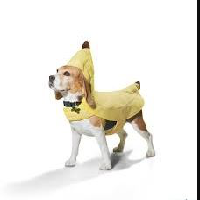

In [124]:
#Fun_testing with a non Banana Image
test_image5 = image.load_img(r"D:\Banana Ripening Process.v1-raw.createml\testing\dog.JPG",target_size =(200,200,3))
test_image5

In [125]:
test_image5=image.img_to_array(test_image5)/255
test_image5=np.expand_dims(test_image5,axis = 0)
np.round(model.predict(test_image5))

1/1 [==============================] - 0s 61ms/step


array([[0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

# Limitations

1. The model is not as accurate when the image contains bananas belonging to different classes together as seen in image 2 above as its output will be for one class or a totally different class. 
2. Caution should be taken when attempting to classify bananas of different spicies that do not follow the green to yellow rippening stages as the model was trained on a species that follows this process as in image 3 above.
3. The model is for Banana classification and may classify/work as expected with images that do not contain bananas as in image 4 above

# Conclusion

Having used CNN, we were able to create a model that correctly clasifies bananas at their different stages of rippening with an accuracy of 83% test accuracy. We have further discussed the limitations of the model and its use.
The model can be made more accurate by limiting the number of classes to 3 reducing misclassification happening due to overlap of classes such as between freshripe/ripe and freshunripe/unripe.
The model can be further advanced to take into account bananas of different speceis while classifying.